# Dicom Explorer

In [30]:
import sys
sys.path.append('../')

from MRIsegm.utils import get_slices, get_slices_info, get_rois, explore_slices, explore_roi, mask_slices

from ipywidgets import interact, fixed

## Loading Data

In [31]:
src = '/Users/giuseppefilitto/Pazienti_anonym_sorted/'
patient = 'BO11/'
dir_path =  src + patient + 'T2AX'

slices = get_slices(dir_path=dir_path) 

get_slices_info(slices=slices)

The image object has the following dimensions: depth:30, height:512, width:512


In [32]:
roi_path = src + patient + 'T2ROI'

rois = get_rois(roi_path=roi_path) 
positions = [rois[i].get('position') - 1 for i in range(len(rois))]

# set(positions) to have unique values
print(f"number of masks = {len(set(positions))}")

number of masks = 17


## Plotting

### Slice

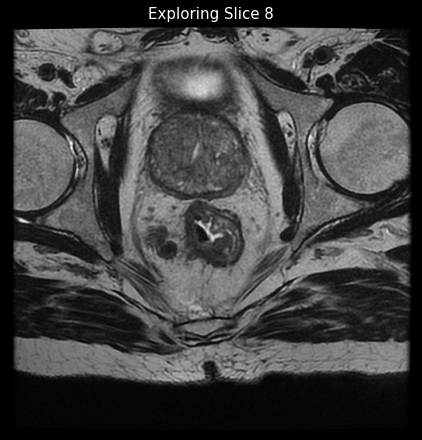

In [33]:
from random import choice

layer = choice(positions)
explore_slices(slices=slices, layer=layer)

### ROI

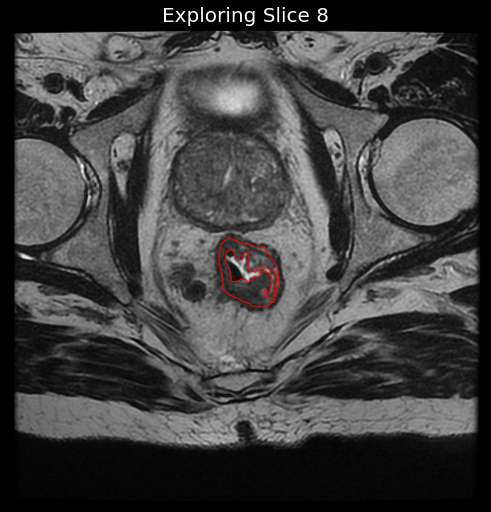

In [34]:
explore_roi(slices=slices, layer=layer, rois=rois)

### Mask

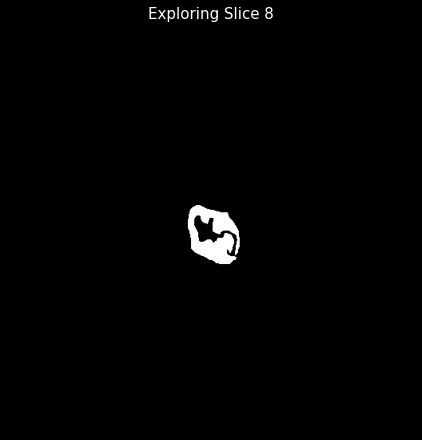

In [35]:
slices_of_masks = mask_slices(slices=slices, rois=rois)

explore_slices(slices=slices_of_masks, layer=layer)

## Interactive Exploration

In [36]:
interact(explore_slices, slices=fixed(slices), layer=(0, slices.shape[0]-1) )

interactive(children=(IntSlider(value=14, description='layer', max=29), Output()), _dom_classes=('widget-inter…

<function MRIsegm.utils.explore_slices(slices, layer, **kwargs)>

In [37]:
interact(explore_roi, slices=fixed(slices), layer=(0, slices.shape[0]-1), rois=fixed(rois))

interactive(children=(IntSlider(value=14, description='layer', max=29), Output()), _dom_classes=('widget-inter…

<function MRIsegm.utils.explore_roi(slices, layer, rois)>

In [38]:
interact(explore_slices, slices=fixed(slices_of_masks), layer=(positions[0], positions[-1])) 

interactive(children=(IntSlider(value=11, description='layer', max=19, min=3), Output()), _dom_classes=('widge…

<function MRIsegm.utils.explore_slices(slices, layer, **kwargs)>